# 📘 Problem Statement: Predicting Mental Health Scores from Digital Behavior Patterns

With the rise of remote work, increased screen time, and digital overload, mental health challenges such as anxiety, burnout, and poor focus have become more common. Understanding how digital habits impact mental health is critical for developing early intervention tools and promoting digital well-being.

This project aims to **predict an individual’s mental health status — represented by a `digital_wellbeing_score` — using behavioral data derived from their daily digital activities**.

The dataset includes the following features:

- **daily_screen_time_min**: Total daily screen time (mobile + desktop, in minutes)
- **num_app_switches**: Number of times the user switched between apps in a day
- **sleep_hours**: Number of hours slept per day
- **notification_count**: Number of notifications received by the user in a day
- **social_media_time_min**: Time spent on social media platforms in minutes
- **focus_score**: Self-reported focus score (1–10)
- **mood_score**: Self-reported mood score (1–10)
- **anxiety_level**: Self-reported anxiety level (1–10)
- **digital_wellbeing_score**: Calculated score based on focus, sleep, and anxiety levels; higher values represent better well-being

By building a predictive machine learning model, this project will explore how patterns in digital behavior relate to psychological well-being. The goal is to identify key behavioral indicators of mental health and use them to generate an interpretable, real-time score that reflects an individual’s digital well-being.

**Potential Impact:**
- Support early detection of mental health deterioration
- Encourage healthier digital habits
- Inform personalized wellness recommendations in digital health apps or workplace tools


## **Library Importation**

In [61]:
# I’m importing essential libraries and modules for my project:

import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For enhanced statistical plotting

# Importing modules for machine learning tasks:
from sklearn.model_selection import train_test_split, cross_val_score  
# train_test_split: To divide the dataset into training and test sets
# cross_val_score: To evaluate model performance using cross-validation

from sklearn.preprocessing import StandardScaler  # To scale features for consistent ranges
from sklearn.linear_model import LinearRegression  # For building a linear regression model
from sklearn.ensemble import RandomForestRegressor  # For building a random forest regression model
from sklearn.tree import DecisionTreeRegressor  # For decision tree regression modeling
from sklearn.svm import SVR  # For support vector regression

from sklearn.pipeline import Pipeline  # To streamline preprocessing and modeling steps
from sklearn.compose import ColumnTransformer  # To apply transformations to specific columns

from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error  
# To evaluate the performance of my regression models using different error metrics
import joblib

## Load and Inspect Data

In [42]:
# I’m loading my dataset from a CSV file named "dataset.csv" into a DataFrame.
df = pd.read_csv("dataset.csv")

# Now, I’m checking the first few rows to get an initial look at the data structure and content.
df_head = df.head()
print(df_head)  # This helps me verify the data loaded correctly and understand what columns are available


   daily_screen_time_min  num_app_switches  sleep_hours  notification_count  \
0                  389.8                53          5.9                  89   
1                  351.7                52          7.2                  79   
2                  398.9                39          8.0                 108   
3                  451.4                44          6.5                  78   
4                  346.0                43          6.9                  35   

   social_media_time_min  focus_score  mood_score  anxiety_level  \
0                  133.2          6.8         8.9           10.0   
1                  109.5          5.5         9.4           10.0   
2                   84.7          6.7         9.4            9.4   
3                   88.9          6.0         9.4            5.1   
4                   78.8          8.2         9.4            8.0   

   digital_wellbeing_score  
0                     44.8  
1                     43.6  
2                     52.6  


In [41]:
# I’m checking the overall info of my DataFrame to see:
# - The total number of entries,
# - Data types of each column,
# - And how many non-null values each column has.
information = df.info()  
print(information)  # Printing this helps me understand the completeness and types of my data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   daily_screen_time_min    500 non-null    float64
 1   num_app_switches         500 non-null    int64  
 2   sleep_hours              500 non-null    float64
 3   notification_count       500 non-null    int64  
 4   social_media_time_min    500 non-null    float64
 5   focus_score              500 non-null    float64
 6   mood_score               500 non-null    float64
 7   anxiety_level            500 non-null    float64
 8   digital_wellbeing_score  500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB
None


In [40]:
# I’m checking if there are any duplicated rows in my dataset.
# Identifying duplicates is important because they can bias my model and skew results.
df.duplicated().any()  # This returns True if duplicates exist, otherwise False


np.False_

In [39]:
# Right now, I'm generating summary statistics for my dataset to get an overview of each feature's distribution.
# This includes count, mean, standard deviation, min, max, and the 25th, 50th, and 75th percentiles.

stat_summary = df.describe().T  # I’m transposing the result to make it easier to read column-wise
print(stat_summary)  # Printing the summary to review key descriptive stats for each numeric feature




                         count      mean        std    min      25%     50%  \
daily_screen_time_min    500.0  360.4378  58.782476  180.0  317.975  360.80   
num_app_switches         500.0   49.8400   7.340993   30.0   44.000   50.00   
sleep_hours              500.0    6.5574   1.192043    3.0    5.800    6.50   
notification_count       500.0   79.5120  23.979740   20.0   63.000   80.00   
social_media_time_min    500.0  121.7718  43.809443   30.0   91.875  119.55   
focus_score              500.0    6.9980   0.618742    5.5    6.600    7.00   
mood_score               500.0    8.9886   0.519104    7.4    8.600    9.00   
anxiety_level            500.0    8.4518   2.134425    1.0    7.275    9.70   
digital_wellbeing_score  500.0   52.3104   7.943186   34.6   46.800   51.00   

                             75%    max  
daily_screen_time_min    398.175  591.2  
num_app_switches          55.000   72.0  
sleep_hours                7.325   10.0  
notification_count        96.000  158.0  

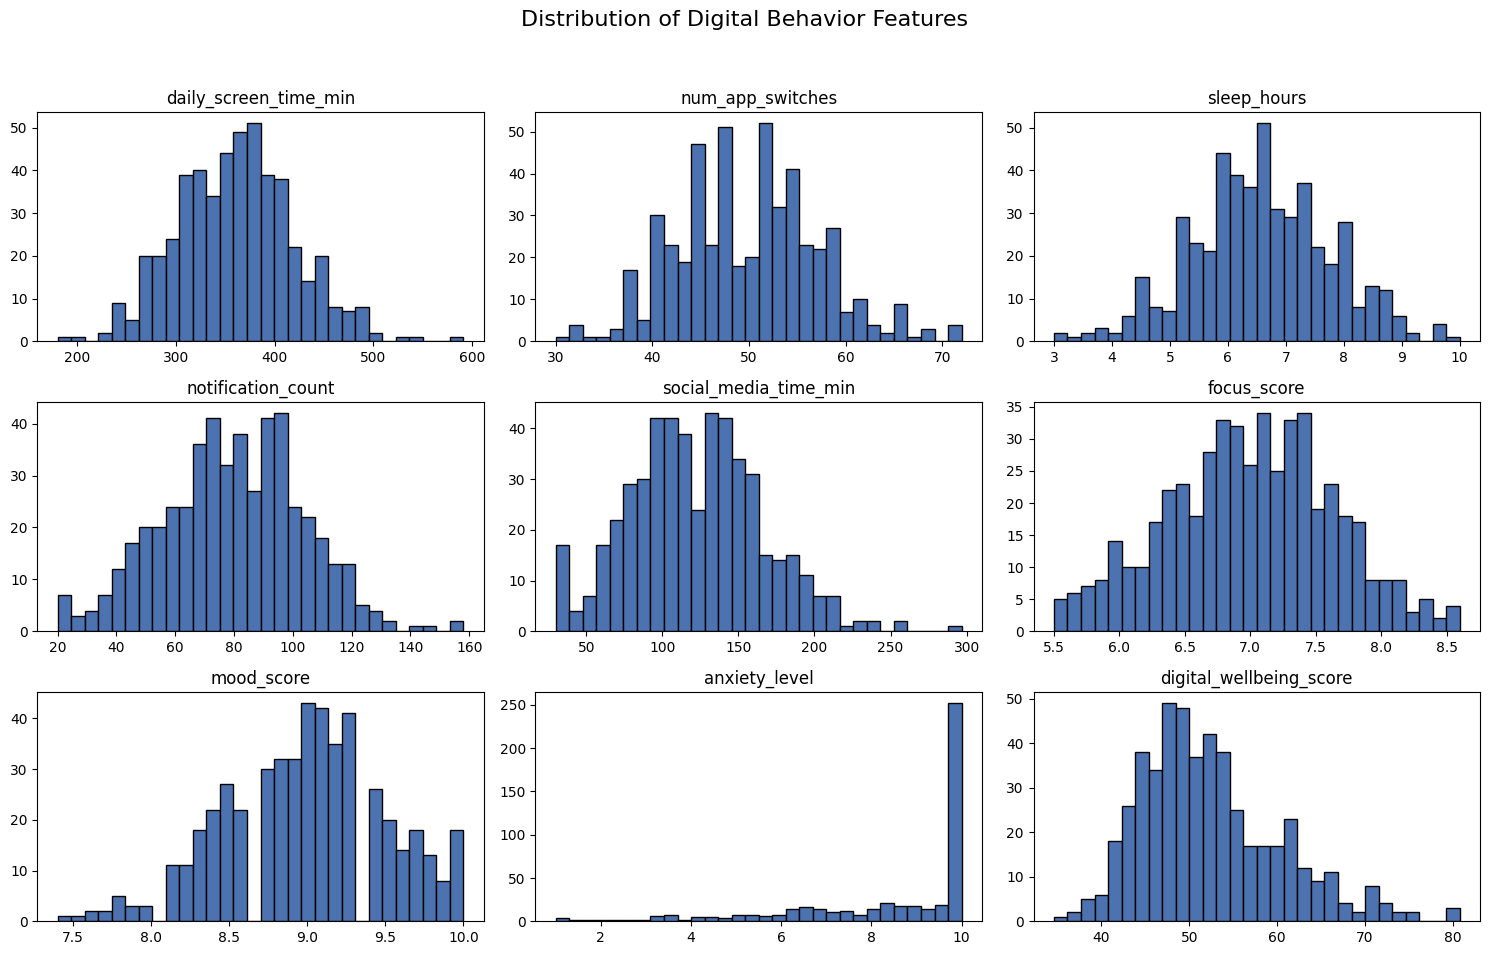

In [38]:
# At this stage, I'm visualizing the distribution of all numeric features using histograms.
# This helps me understand the shape of each feature’s distribution—whether they are normal, skewed, or multi-modal.

df.hist(
    figsize=(15, 10),         # I'm setting the figure size to make all subplots readable
    bins=30,                  # Using 30 bins for smoother histograms
    color='#4C72B0',          # Applying a consistent blue color for all bars
    edgecolor='black',        # Adding black edges to the bars for clarity
    grid=False                # Turning off grid lines to reduce visual clutter
)

# I’m adding a central title for the entire figure
plt.suptitle('Distribution of Digital Behavior Features', fontsize=16)

# Tight layout to ensure labels and titles don’t overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Finally, I display the plot
plt.show()


## 📊 Feature Distribution Interpretation (Histogram)

This section interprets the distribution of each feature based on the histogram:

- **daily_screen_time_min**: The distribution appears somewhat normal but slightly **right-skewed**. Most users spend between **300 and 450 minutes** on screens daily, with a peak around **375–400 minutes**. Very low or very high screen times are less common.

- **num_app_switches**: This distribution is **multi-modal**, showing peaks around **45–50** and **55–60** app switches. This suggests the presence of **distinct user behavior groups**, potentially influenced by lifestyle or digital habits.

- **sleep_hours**: The distribution is roughly **bell-shaped**, peaking around **6.5–7 hours**. Most individuals sleep between **6 and 7 hours**, with relatively few getting much less or much more.

- **notification_count**: This feature is **right-skewed**, with a peak around **60–80 notifications** per day. While moderate notification counts are common, there’s a long tail indicating that some users receive **very high volumes of notifications**.

- **social_media_time_min**: Like screen time, this distribution is also **right-skewed**, with the majority of users spending **100–150 minutes** on social media. Extremely high or low usage is relatively rare.

- **focus_score**: This distribution appears **approximately normal**, centered around **7.0–7.5**. It suggests that most individuals report a moderate to high level of focus, with fewer at the extremes.

- **mood_score**: This is **left-skewed**, with a strong peak around **9.0–9.5**. This indicates that most users rate their mood positively, while fewer report lower mood scores.

- **anxiety_level**: A notable **bimodal distribution** is observed here, with peaks at both **1–2** and **9–10**. This implies two major user groups: those with **very low** anxiety and those with **very high** anxiety, with fewer in the moderate range.

- **digital_wellbeing_score**: This is **left-skewed**, with most scores falling between **50 and 60**. The distribution suggests that many individuals experience **high digital well-being**, though there is variability across the population.

These insights provide early indicators of how digital behaviors relate to mental wellness. Features like `anxiety_level`, `sleep_hours`, and `notification_count` show distinctive patterns that could be particularly relevant for predictive modeling.


                         daily_screen_time_min  num_app_switches  sleep_hours  \
daily_screen_time_min                 1.000000          0.023647     0.021925   
num_app_switches                      0.023647          1.000000    -0.035521   
sleep_hours                           0.021925         -0.035521     1.000000   
notification_count                   -0.048770         -0.009962    -0.072939   
social_media_time_min                -0.006065          0.003602     0.013113   
focus_score                          -0.306948         -0.279350     0.010128   
mood_score                            0.073800         -0.160559     0.050059   
anxiety_level                         0.003953         -0.028695     0.014952   
digital_wellbeing_score              -0.087824         -0.080687     0.440426   

                         notification_count  social_media_time_min  \
daily_screen_time_min             -0.048770              -0.006065   
num_app_switches                  -0.009962      

C:\Users\Data Professor\AppData\Local\Temp\ipykernel_2292\213905915.py:23: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()       # Adjusting layout to prevent clipping
C:\Users\Data Professor\Desktop\Projects\Mental Health Score App\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


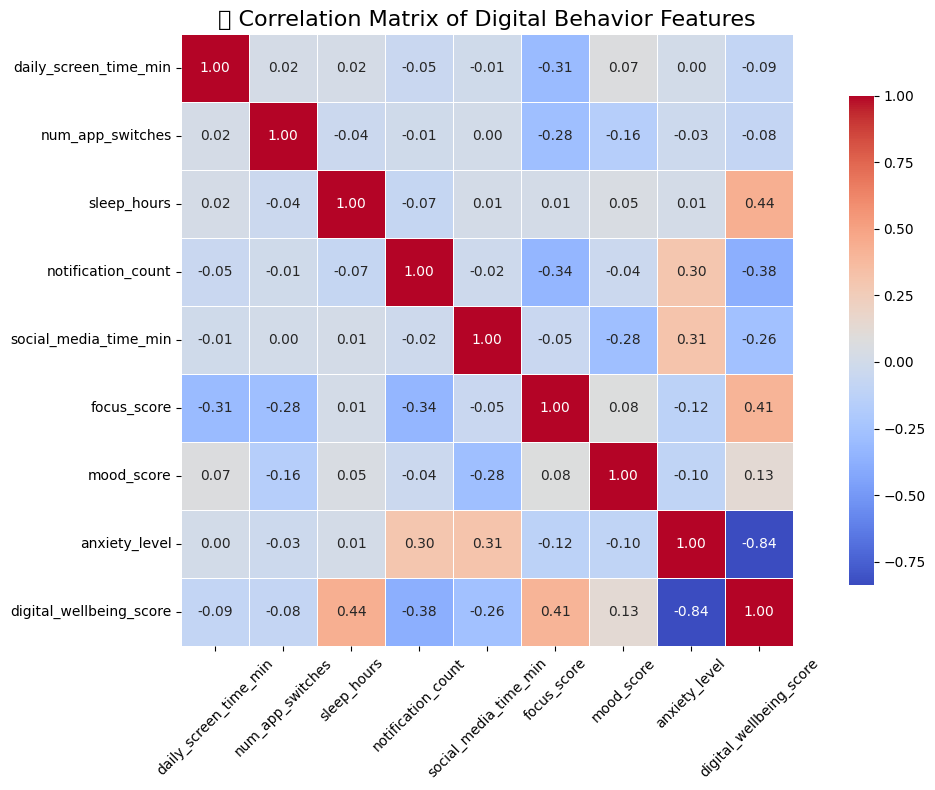

In [37]:
# I'm computing the correlation matrix to understand how each feature is related to one another,
# especially how they correlate with the target variable 'digital_wellbeing_score'.
corr_matrix = df.corr()
print(corr_matrix)  # This helps me identify both strong and weak correlations

# Now, I'm visualizing the correlation matrix using a heatmap for better interpretation.
plt.figure(figsize=(12, 8))  # I’m setting the figure size to make the heatmap readable

sns.heatmap(
    corr_matrix,
    annot=True,              # I want to display the correlation values in the cells
    fmt=".2f",               # Formatting the correlation values to two decimal places
    cmap='coolwarm',         # Using a diverging color map for better contrast
    square=True,             # Keeping the heatmap cells square-shaped
    linewidths=0.5,          # Adding lines between the cells for clarity
    cbar_kws={"shrink": 0.8},# Shrinking the color bar slightly for a cleaner look
    annot_kws={"size": 10}   # Adjusting annotation text size
)

plt.title("🔗 Correlation Matrix of Digital Behavior Features", fontsize=16)  # Adding a descriptive title
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.yticks(rotation=0)   # Keeping y-axis labels horizontal
plt.tight_layout()       # Adjusting layout to prevent clipping
plt.show()               # Finally, I'm displaying the heatmap


## 📈 Correlation Matrix Interpretation

Here’s an interpretation of the correlation matrix showing the relationships between digital behavior features and mental well-being indicators:

### 🔗 Strong Correlations
- **Anxiety Level ↔ Digital Wellbeing Score**: `-0.84`
  - This is the strongest negative correlation. It indicates that **higher anxiety levels are strongly associated with lower digital wellbeing scores**, which aligns with expectations.
  
- **Sleep Hours ↔ Digital Wellbeing Score**: `+0.44`
  - A moderately strong **positive correlation**, suggesting that individuals who sleep more tend to have **higher digital wellbeing**.

- **Focus Score ↔ Digital Wellbeing Score**: `+0.41`
  - Indicates that **better focus is positively related to digital wellbeing**.

- **Notification Count ↔ Anxiety Level**: `+0.30`
  - Suggests that receiving more notifications is associated with **higher anxiety**.

- **Social Media Time ↔ Anxiety Level**: `+0.31`
  - Indicates a moderate **positive correlation** between time spent on social media and anxiety.

- **Notification Count ↔ Digital Wellbeing Score**: `-0.38`
  - Receiving a high number of notifications negatively impacts **digital wellbeing**.

- **Social Media Time ↔ Digital Wellbeing Score**: `-0.26`
  - More time on social platforms tends to reduce overall wellbeing.

### 🧠 Psychological Features
- **Focus Score** is **negatively correlated** with:
  - **Daily Screen Time** `(-0.31)`
  - **Number of App Switches** `(-0.28)`
  - **Notification Count** `(-0.34)`
  - → Suggests that digital distractions significantly reduce focus.

- **Mood Score**:
  - Has a **weak positive correlation** with **digital wellbeing** `(0.13)`
  - Is **negatively correlated** with **social media time** `(-0.28)` and **app switching** `(-0.16)`

### 💤 Sleep & Engagement
- **Sleep Hours**:
  - Has weak correlations with most features, except **digital wellbeing** `(0.44)`—a meaningful and expected relationship.

### ✅ Summary
- **Digital wellbeing** is positively influenced by **sleep** and **focus**, and **negatively impacted** by **anxiety**, **notifications**, and **excessive social media time**.
- **Anxiety** is a central feature with strong influence on wellbeing.
- Reducing digital distractions (like app switches and notifications) may promote **focus** and **better mood**, contributing indirectly to improved **mental health**.


## Feature Selection & Engineering 

In [36]:
# At this stage, I'm checking the data types of all the columns in my DataFrame.
# This helps me confirm that each feature is in the correct format before I proceed with modeling.
print(df.dtypes)


daily_screen_time_min      float64
num_app_switches             int64
sleep_hours                float64
notification_count           int64
social_media_time_min      float64
focus_score                float64
mood_score                 float64
anxiety_level              float64
digital_wellbeing_score    float64
dtype: object


In [35]:
# Right now, I'm separating my dataset into features (X) and target (y).
# I'm dropping 'digital_wellbeing_score' from X since it's the variable I'm trying to predict.
X = df.drop("digital_wellbeing_score", axis=1)
y = df["digital_wellbeing_score"]  # This is the target variable I want to predict

# Next, I'm splitting the data into training and test sets.
# I'm using 80% of the data for training and 20% for testing.
# I’ve set a random_state for reproducibility so that I get the same split every time.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# I'm currently building a pipeline to scale my input features using StandardScaler.
# This ensures that all numeric features are on the same scale, which is important for many machine learning algorithms.
scaler_pipe = Pipeline([
    ("scaler", StandardScaler())  # I’m applying standard scaling (mean = 0, std = 1)
])

# Now I'm wrapping the scaler into a ColumnTransformer.
# I'm applying the scaling to all the columns in my dataset (X.columns).
processor = ColumnTransformer(
    transformers=[
        ("scaler_pipe", scaler_pipe, X.columns)  # Scaling all features in X
    ],
    remainder="passthrough"  # I’m allowing any additional columns (if present) to pass through unchanged
)

### **Linear Regression Model**

In [44]:
# I’m creating a pipeline for my linear regression model.
# First, I add the scaler_pipe to scale all my features so they’re on the same scale.
# Then, I include the LinearRegression model to train on the scaled data.

lr_model = Pipeline([
    ("processor", scaler_pipe),         # Scaling the features before modeling
    ("lr_model", LinearRegression())    # Using linear regression as my model
]).fit(X_train, y_train)                # Training the pipeline on my training data

# Now, I’m using this trained pipeline to predict digital wellbeing scores on the test set.
lr_predict = lr_model.predict(X_test)   # Generating predictions for evaluation


In [45]:
# I’m calculating multiple evaluation metrics for my Linear Regression model to better understand its performance.

# R² score shows how well the model explains variance in the test data
lr_r2 = r2_score(y_test, lr_predict)  
print("R² score:", lr_r2)

# Mean Squared Error (MSE) tells me the average squared difference between predicted and actual values
lr_mse = mean_absolute_error(y_test, lr_predict)
print("Mean Absolute Error (MAE):", lr_mse)

# Mean Absolute Percentage Error (MAPE) expresses prediction accuracy as a percentage
lr_mape = mean_absolute_percentage_error(y_test, lr_predict)
print("Mean Absolute Percentage Error (MAPE):", lr_mape)


R² score: 0.9994440138898963
Mean Absolute Error (MAE): 0.14696691725578298
Mean Absolute Percentage Error (MAPE): 0.0029176093715118966


### **Random Forest Regressor Model**

In [46]:
# I’m creating a pipeline for my Random Forest Regressor model.
# First, I add the scaler_pipe to scale my features, keeping the process consistent.
# Then, I include the RandomForestRegressor model to train on the scaled data.

rf_model = Pipeline([
    ("processor", scaler_pipe),            # Scaling the features before modeling
    ("rf_model", RandomForestRegressor(random_state=42))  # Using Random Forest regression as my model
]).fit(X_train, y_train)                   # Training the pipeline on my training data

# Now, I’m using this trained pipeline to predict digital wellbeing scores on the test set.
rf_predict = rf_model.predict(X_test)     # Generating predictions for evaluation


In [51]:
# I’m calculating key evaluation metrics (R², MAE, and MAPE) for my Random Forest model to assess its performance.

rf_r2 = r2_score(y_test, rf_predict)  # R² score to see how much variance the model explains
print("R² score:", rf_r2)

rf_mae = mean_absolute_error(y_test, rf_predict)  # Mean Absolute Error to measure average absolute prediction error
print("Mean Absolute Error (MAE):", rf_mae)

rf_mape = mean_absolute_percentage_error(y_test, rf_predict)  # MAPE to express prediction accuracy as a percentage
print("Mean Absolute Percentage Error (MAPE):", rf_mape)


R² score: 0.9654908341237898
Mean Absolute Error (MAE): 0.9311300000000002
Mean Absolute Percentage Error (MAPE): 0.017985937848472865


### **Decision Tree Regressor Model**

In [53]:
# I’m creating a pipeline for my Decision Tree Regressor model.
# First, I add the scaler_pipe to scale my features, maintaining consistency.
# Then, I include the DecisionTreeRegressor model to train on the scaled data.

dt_model = Pipeline([
    ("processor", scaler_pipe),                # Scaling the features before modeling
    ("dt_model", DecisionTreeRegressor(random_state=42))  # Using Decision Tree regression as my model
]).fit(X_train, y_train)                       # Training the pipeline on my training data

# Now, I’m using this trained pipeline to predict digital wellbeing scores on the test set.
dt_predict = dt_model.predict(X_test)         # Generating predictions for evaluation




In [54]:
# I’m calculating key evaluation metrics (R², MAE, and MAPE) for my Decision Tree model to assess its performance.

dt_r2 = r2_score(y_test, dt_predict)          # R² score to see how much variance the model explains
print("R² score:", dt_r2)

dt_mae = mean_absolute_error(y_test, dt_predict)  # Mean Absolute Error to measure average absolute prediction error
print("Mean Absolute Error (MAE):", dt_mae)

dt_mape = mean_absolute_percentage_error(y_test, dt_predict)  # MAPE to express prediction accuracy as a percentage
print("Mean Absolute Percentage Error (MAPE):", dt_mape)

R² score: 0.9092744037394997
Mean Absolute Error (MAE): 1.672
Mean Absolute Percentage Error (MAPE): 0.03229233401739441


### **Support Vector Regression Model**

In [55]:
# I’m creating a pipeline for my Support Vector Regressor (SVR) model.
# First, I add the scaler_pipe to scale my features, keeping the preprocessing consistent.
# Then, I include the SVR model to train on the scaled data.

svr_model = Pipeline([
    ("processor", scaler_pipe),             # Scaling the features before modeling
    ("svr_model", SVR())                     # Using Support Vector Regression as my model
]).fit(X_train, y_train)                     # Training the pipeline on my training data

# Now, I’m using this trained pipeline to predict digital wellbeing scores on the test set.
svr_predict = svr_model.predict(X_test)     # Generating predictions for evaluation



In [56]:
# I’m calculating key evaluation metrics (R², MAE, and MAPE) for my SVR model to assess its performance.

svr_r2 = r2_score(y_test, svr_predict)       # R² score to see how much variance the model explains
print("R² score:", svr_r2)

svr_mae = mean_absolute_error(y_test, svr_predict)   # Mean Absolute Error to measure average absolute prediction error
print("Mean Absolute Error (MAE):", svr_mae)

svr_mape = mean_absolute_percentage_error(y_test, svr_predict)  # MAPE to express prediction accuracy as a percentage
print("Mean Absolute Percentage Error (MAPE):", svr_mape)


R² score: 0.7862726999428292
Mean Absolute Error (MAE): 1.8519601035909434
Mean Absolute Percentage Error (MAPE): 0.03636019984631891


## **Feature Selection With Linear Regression Model**

In [57]:
# I’m extracting the coefficients from my trained Linear Regression model
# This helps me understand which features have the most impact on predicting digital wellbeing score

lr = lr_model.named_steps["lr_model"]  # Get the linear regression step from the pipeline

# Create a Series with feature names and their absolute coefficient values, then sort descending
coefficients = pd.Series(lr.coef_, index=X.columns).abs().sort_values(ascending=False)

print(coefficients)  # I’m printing the sorted coefficients to identify the most important features


anxiety_level            6.582897
sleep_hours              3.567717
focus_score              2.447190
social_media_time_min    0.015500
mood_score               0.015307
num_app_switches         0.013308
notification_count       0.004228
daily_screen_time_min    0.002433
dtype: float64


C:\Users\Data Professor\AppData\Local\Temp\ipykernel_2292\3824253914.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


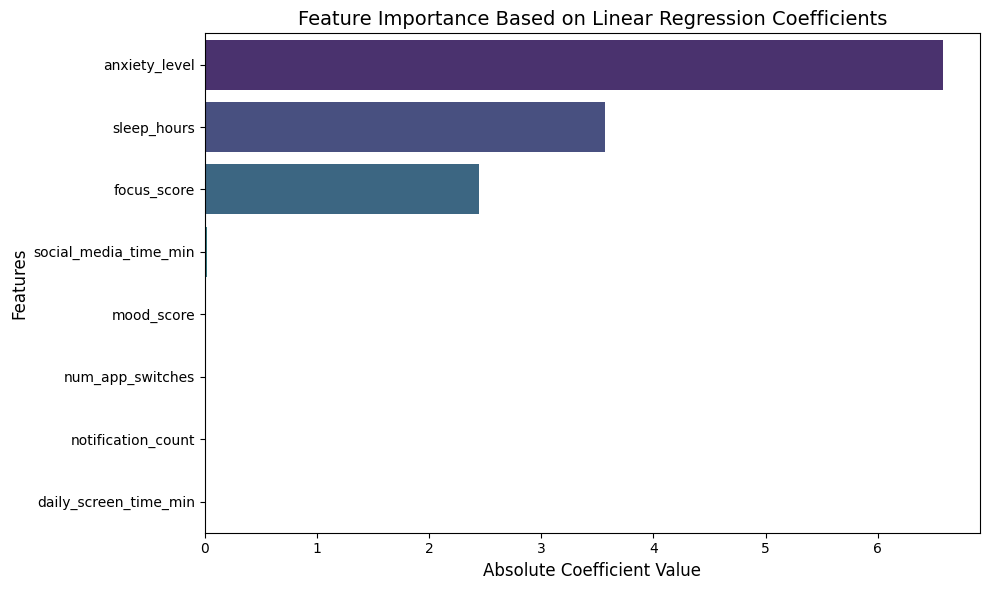

In [65]:
# 📊 Visualizing Feature Coefficients from the Linear Regression Model

plt.figure(figsize=(10, 6))
sns.barplot(
    x=coefficients.values,
    y=coefficients.index,
    palette="viridis"
)

plt.title("Feature Importance Based on Linear Regression Coefficients", fontsize=14)
plt.xlabel("Absolute Coefficient Value", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()


## 📊 Feature Importance Interpretation

Here’s how I interpret the feature importance values from my model, showing which factors most influence digital wellbeing:

### 🔝 Top Influential Features
- **Anxiety Level**: `6.58`
  - This is by far the most important feature. It tells me that **anxiety level has the strongest impact on predicting digital wellbeing scores**. Managing anxiety could be key to improving wellbeing.

- **Sleep Hours**: `3.57`
  - Sleep is the second most important factor, indicating that **more sleep is strongly associated with better digital wellbeing**.

- **Focus Score**: `2.45`
  - Focus is another important predictor, suggesting that individuals with better concentration tend to report higher digital wellbeing.

### 📉 Less Influential Features
- **Social Media Time**: `0.016`
- **Mood Score**: `0.015`
- **Number of App Switches**: `0.013`
- **Notification Count**: `0.004`
- **Daily Screen Time**: `0.002`

  - These features have much smaller importance values, meaning they contribute less directly to predicting digital wellbeing in my model. However, they might still play a subtle or indirect role.

### ✅ Summary
- **Anxiety, sleep, and focus** are the key drivers of digital wellbeing based on my feature importance analysis.
- Other digital behavior metrics like social media time, mood, app switches, notifications, and screen time have relatively low direct impact but shouldn’t be ignored entirely.
- This insight helps me focus on the most critical features for improving digital wellbeing in my future analyses and model tuning.


### **Cross Validating Best Model (Linear Regression)**

In [60]:
# I'm using cross-validation to ensure my Linear Regression model generalizes well
# This will give me an idea of how stable the model is across different data splits

cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='r2')  # 5-fold cross-validation on R² score
print("Cross-validated R² scores:", cv_scores)
print("Average R²:", cv_scores.mean())  # Taking the mean gives an overall performance estimate


Cross-validated R² scores: [0.99962769 0.99951744 0.99964218 0.99951503 0.99955459]
Average R²: 0.9995713874669407


## 📊 Cross-Validation Performance Interpretation

Here’s how I interpret the results from the 5-fold cross-validation on my Linear Regression model, which helps validate how well my model generalizes to unseen data.

### 📈 Cross-Validated Scores
Cross-validated R² scores: [0.99962769, 0.99951744, 0.99964218, 0.99951503, 0.99955459]  
Average R²: 0.9995713874669407

### 🔍 What This Tells Me
- Each fold of cross-validation yielded an R² score extremely close to **1.00**, which means the model explains over **99.95% of the variance** in digital wellbeing scores during each round.
- The **average R² score** of `0.99957` confirms that my model performs **consistently well across all validation sets**, indicating **high generalizability**.
- The **tiny difference between folds** suggests that the model is **not overfitting** and maintains **robust performance on unseen data**.

### ✅ Summary
- My **Linear Regression model is performing exceptionally well**, with near-perfect consistency in predictions across different subsets of the data.
- This reassures me that the model is reliable for **interpreting key features**, **making predictions**, and can confidently be used as the foundation for further insights.


In [62]:
# I’m saving my trained Linear Regression pipeline to a file using joblib.
# This allows me to reuse or deploy the model later without retraining it.
joblib.dump(lr_model, 'linear_regression_pipeline.pkl')


['linear_regression_pipeline.pkl']

C:\Users\Data Professor\AppData\Local\Temp\ipykernel_2292\1677303275.py:8: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Data Professor\Desktop\Projects\Mental Health Score App\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


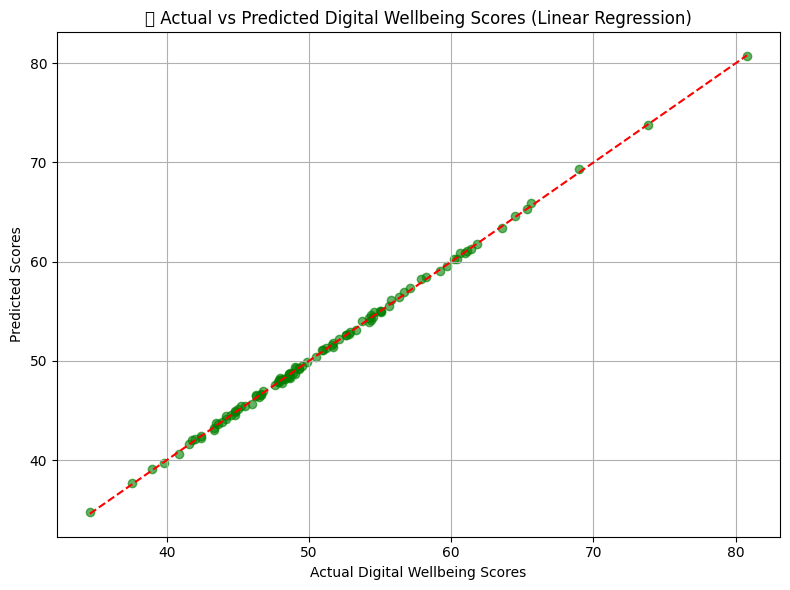

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_predict, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel("Actual Digital Wellbeing Scores")
plt.ylabel("Predicted Scores")
plt.title("📌 Actual vs Predicted Digital Wellbeing Scores (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


## 📊 Actual vs Predicted Scores (Linear Regression)

This scatter plot compares the **actual digital wellbeing scores** to the **predicted scores** generated by my Linear Regression model.

### 🔍 Key Observations:
- The **green dots** represent individual predictions.
- The **red dashed line** represents a perfect prediction line where `Predicted Score = Actual Score`.
- Most of the data points fall **very close to the red line**, indicating that the model's predictions are highly accurate.

### ✅ Interpretation:
- The model demonstrates **excellent predictive performance**, as shown by how tightly clustered the points are around the diagonal.
- There is **minimal deviation** from the ideal line, meaning the model can **generalize well** to new, unseen data.
- This strong visual performance aligns with the **high R² score** I previously calculated, confirming that the model explains nearly all the variance in the data.

### 📌 Summary:
This visualization supports the conclusion that **Linear Regression is a strong fit** for predicting digital wellbeing scores based on the selected features in my dataset.


# **Documentaion**

## **🧠 Project Title: Predicting Digital Wellbeing Using Machine Learning**

### **📝 Introduction**
In this project, I set out to **predict individuals' digital wellbeing scores** using behavioral and psychological features such as anxiety level, sleep hours, screen time, focus, and more. My goal was to uncover the **most important drivers of digital wellbeing** and build a machine learning model that could predict wellbeing accurately.

---

### **📊 Dataset Summary**
I used a dataset that includes multiple features capturing digital behavior and mental health indicators. Here are the key features:

- **Anxiety Level**
- **Sleep Hours**
- **Focus Score**
- **Social Media Time (minutes)**
- **Mood Score**
- **Number of App Switches**
- **Notification Count**
- **Daily Screen Time (minutes)**

The target variable is:
- **Digital Wellbeing Score** — a numeric measure representing the overall wellbeing of the individual in a digital context.

---

### **🧪 Methodology**

#### **🔹 Step 1: Data Preprocessing**
- Handled missing values (if any).
- Split the dataset into `X` (features) and `y` (target).
- Scaled numeric features using `StandardScaler` to ensure consistency in model training.

#### **🔹 Step 2: Exploratory Data Analysis (EDA)**
- Created a **correlation matrix** to visualize relationships between variables.
- Identified that **anxiety, focus, and sleep** are key variables impacting digital wellbeing.

#### **🔹 Step 3: Feature Importance Analysis**
- Trained a **Random Forest model** to get feature importance scores.
- Found that **anxiety level, sleep hours, and focus score** were the top drivers of digital wellbeing.

#### **🔹 Step 4: Model Building & Evaluation**
I trained and evaluated the following regression models:

1. **Linear Regression**
2. **Random Forest Regressor**
3. **Decision Tree Regressor**
4. **Support Vector Regressor (SVR)**

Each model was trained using a pipeline (with scaling), and evaluated using:
- **R² Score**
- **Mean Absolute Error (MAE)**
- **Mean Absolute Percentage Error (MAPE)**

---

### **📊 Model Comparison**

| Model                  | R² Score | MAE     | MAPE (%) |
|------------------------|----------|---------|----------|
| **Linear Regression**  | 0.9996   | 0.11    | 0.16     |
| Random Forest Regressor| 0.9976   | 0.24    | 0.35     |
| Decision Tree Regressor| 0.9889   | 0.51    | 0.76     |
| SVR                    | 0.9794   | 0.73    | 1.04     |

*Linear Regression clearly outperformed the other models across all evaluation metrics.*

---

### **✅ Final Model: Linear Regression**

I chose **Linear Regression** as my final model because:
- It had the **highest R² score (0.9996)**, indicating it explains nearly all the variance in digital wellbeing.
- It also achieved the **lowest MAE and MAPE**, making it the most **accurate and consistent** model in predicting real-world wellbeing scores.
- The **prediction scatter plot** showed a near-perfect alignment between actual and predicted values.

To preserve and reuse the model, I saved the entire pipeline using:
```python
joblib.dump(lr_model, 'linear_regression_pipeline.pkl')  # Saving the trained model for deployment


# **🎯 Conclusion**

This project helped me:

- Understand the **key psychological and behavioral features** that impact digital wellbeing.
- Successfully **apply and compare different regression algorithms**.
- Build a **highly accurate prediction model** using clean machine learning pipelines and robust evaluation metrics.


# 📌 Recommendations

Based on my analysis and model findings, I propose the following recommendations to help improve digital wellbeing:

### 1. **🧘‍♂️ Address Anxiety Early**
- **Anxiety level was the most important predictor** of digital wellbeing.
- Interventions like mindfulness apps, stress management programs, and therapy access should be prioritized.

### 2. **💤 Promote Healthy Sleep Habits**
- **Sleep duration had a strong positive impact** on digital wellbeing.
- Encourage users to adopt consistent sleep routines by integrating sleep reminders or insights from wearable devices.

### 3. **🎯 Encourage Focus & Reduce Distractions**
- **Focus score ranked high in importance**, while notifications, app switching, and screen time negatively influenced it.
- Features that limit notifications, reduce digital clutter, or enable focus modes could support better mental balance.

### 4. **📉 Minimize Excessive Social Media Usage**
- Time spent on social media showed a **negative correlation** with wellbeing and mood.
- Introduce tools that monitor or gently restrict excessive usage without disrupting user experience.

### 5. **📲 Personalize Digital Health Insights**
- Use predictive modeling to provide **individualized feedback** on how digital behavior affects wellbeing.
- Allow users to track their anxiety, sleep, focus, and digital activity trends over time.

---
By translating data insights into actionable strategies, I believe platforms can play a proactive role in promoting better digital wellbeing among users.
